In [49]:
from RankOrder_LIP import *
import numpy as np
import time
import matplotlib.pyplot as plt

In [50]:
# Test the function
preferences = [      # higher number == more preferred
    [3, 2, 1],
    [3, 1, 2],
    [3, 2, 1],
    [1, 3, 2]
]
doctor_capacity = [3, 2, 2]

assignments = ilp_assignment(preferences, doctor_capacity)
print("Assignments:", assignments)

Assignments: [[0, 1, 2], [3], []]


In [51]:
# testing scalability
sizes = np.logspace(1, 3, num=6, dtype=int)
times = np.zeros_like(sizes, dtype=float)

for i, size in enumerate(sizes):
    print(size)
    
    # generate random preference list
    preferences = []
    for j in range(size):
        preferences.append(list(np.random.permutation(np.arange(1,size+1))))
    capacity = [2] * size
        
    # run algorithm
    start = time.time_ns()
    assignments = ilp_assignment(preferences, capacity)
    times[i] = time.time_ns() - start

10
25
63
158
398
1000


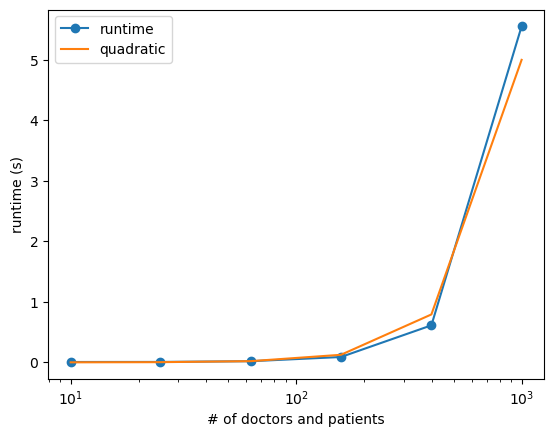

In [58]:
plt.plot(sizes, times/10e9, marker='o', label='runtime'); 
plt.plot(sizes, sizes**2/200000, label='quadratic')
plt.xlabel("# of doctors and patients"); plt.ylabel("runtime (s)");
plt.semilogx(); plt.legend();